<a href="https://colab.research.google.com/github/chizuchizu/IOAI/blob/main/Task3/chizu_003_task3_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import importlib

if importlib.util.find_spec('datasets') is None:
    !pip install torch==2.2.1 transformers==4.39.1 diffusers==0.27.2 torchvision==0.17.1 datasets==2.18.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 65.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 93.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 46.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56

In [2]:
import datasets

In [8]:
dataset = datasets.load_dataset("poloclub/diffusiondb", use_auth_token=True)

/usr/local/lib/python3.10/dist-packages/datasets/load.py:2516: FutureWarning: 'use_auth_token' was deprecated in favor of 'token' in version 2.14.0 and will be removed in 3.0.0.
You can remove this warning by passing 'token=<use_auth_token>' instead.
  warnings.warn(


Generating train split: 0 examples [00:00, ? examples/s]

DatasetGenerationError: An error occurred while generating the dataset

In [9]:
train_sample = datasets.load_dataset("poloclub/diffusiondb", split="train[:20]")

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1461: FutureWarning: The repository for poloclub/diffusiondb contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/poloclub/diffusiondb
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Generating train split: 0 examples [00:00, ? examples/s]

In [11]:
train_sample[0]

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512>,
 'prompt': 'Billie Eilish in Cat in The Hat Movie, XF IQ4, 150MP, 50mm, F1.4, ISO 200, 1/160s, natural light',
 'seed': 3598669055,
 'step': 50,
 'cfg': 7.0,
 'sampler': 'k_lms',
 'width': 512,
 'height': 512,
 'user_name': 'cff26110e978893371c5c767723cbb7a3f4322ec268da2a42902811066969d3a',
 'timestamp': datetime.datetime(2022, 8, 9, 2, 10, tzinfo=<UTC>),
 'image_nsfw': 0.048237625509500504,
 'prompt_nsfw': 0.00020555885566864163}

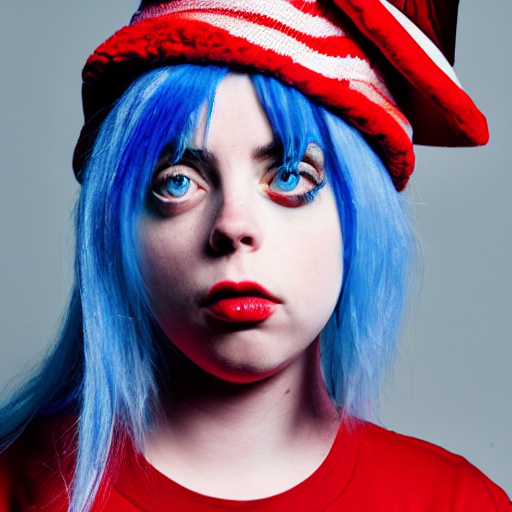

In [12]:
train_sample[0]["image"]

In [14]:
dataset = datasets.load_dataset('poloclub/diffusiondb', '2m_text_only')

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1461: FutureWarning: The repository for poloclub/diffusiondb contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/poloclub/diffusiondb
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Generating train split: 0 examples [00:00, ? examples/s]

In [28]:
sample = datasets.load_dataset("poloclub/diffusiondb", "2m_all", num_proc=2)

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1461: FutureWarning: The repository for poloclub/diffusiondb contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/poloclub/diffusiondb
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


KeyboardInterrupt: 

In [27]:
sample["train"]

Dataset({
    features: ['image', 'prompt', 'seed', 'step', 'cfg', 'sampler', 'width', 'height', 'user_name', 'timestamp', 'image_nsfw', 'prompt_nsfw'],
    num_rows: 1000
})

## Starting the diffusion

Let's start with generating some images with our model to see current state.
Download the model and use diffusers library to make some brand new images.

In [ ]:
from diffusers import DiffusionPipeline
import torch

In [ ]:
base_model_name = "lambdalabs/miniSD-diffusers"
pipe = DiffusionPipeline.from_pretrained(base_model_name)
device = 'cuda'
pipe.to(device)

In [ ]:
for prompt in ['Happy giraffe running', 'Giraffe spending time with her friends', 'Mountain giraffe cooking marshmallow']:
    image = pipe(prompt=prompt, generator=torch.Generator(device=device).manual_seed(42)).images[0]
    display(image.resize((384, 384)))



In [ ]:
for prompt in ['Zebras playing football', 'Rocker zebra on a motorcycle', 'K-pop zebra singing on stage']:
    image = pipe(prompt=prompt, generator=torch.Generator(device="cuda").manual_seed(10)).images[0]
    display(image.resize((384, 384)))


# Looking closer
As we see, the output images may not be of ideal quality, but the bigger model didn't fit into a spaceship and you need to be ascetic during the stellar travels.
The key point is that the model terminology is still Earth-based.

Let's see what the model consists of:

In [ ]:
pipe.to("cpu")
print(pipe.components.keys())


The components `tokenizer` and `text_encoder` works with text.
More specifically, model operates with numbers, not letters, and this components are here to deal with this.

In [ ]:
tokenizer = pipe.tokenizer
print(tokenizer('Zebra is cool'))
print(tokenizer('Zebra has long neck'))


Notice how some tokens repeat in both sequences: 49406, 22548, 49407. We can check what they mean


In [ ]:
print(tokenizer.decode([49406]))
print(tokenizer.decode([49407]))
print(tokenizer.decode([22548]))


Wow, we spotted a specific token for 'zebra'! The other two tokens are technical and not as interesting. The problem with the token sequence is that it is just an arbitrary number, so we use a text encoder to create a compact representation of meaning.

In [ ]:
text_encoder = pipe.text_encoder

def get_vector(name):
    tokens = tokenizer(name, return_tensors='pt')['input_ids']
    sequence = text_encoder(tokens).last_hidden_state
    vector = sequence[:, 1]  # we took 1, because on position 0 is <|startoftext|> token
    return vector

whale_vector = get_vector('whale')
elephant_vector = get_vector('elephant')
clown_vector = get_vector('clown')


In [ ]:
from torch.nn.functional import cosine_similarity as similarity

print('Similarity between whale and elephant is', similarity(whale_vector, elephant_vector).item())
print('Similarity between whale and clown is', similarity(whale_vector, clown_vector).item())


As we see, model knows that whale tends to not have a red nose.

### VAE (variational autoencoder)
VAE is similar to text_encoder, but it works with images. It's a neural network that can encode an image into a compact representation and then decode it back. It is more compact and robust than pixel values. Imagine, for example, that you wanted to have a picture of a baby otter with you, but you need it to be compact.


In [ ]:
from PIL import Image
import requests

vae = pipe.vae
url = "https://i.pinimg.com/originals/6b/74/7b/6b747b6d6648bbdf9c34d711bb7ab552.jpg"
baby_otter = Image.open(requests.get(url, stream=True).raw)
display(baby_otter.resize((384,320)))

In [ ]:
from torchvision.transforms.functional import pil_to_tensor, to_pil_image
otter_tensor = pil_to_tensor(baby_otter).float().unsqueeze(0) / 255 - 0.5   #some magick to convert to format pytorch understands

In [ ]:
# vae.encode(otter_tensor)
otter_tensor.shape

In [ ]:
encoded_otter = vae.encode(otter_tensor).latent_dist.sample()

In [ ]:
print("Original shape", otter_tensor.shape)
print("Encoded shape", encoded_otter.shape)

So, original otter was `3*1006*1242`, which is approximately 3.6M numbers. Encoded otter is `4*125*125`
, which is 60k numbers, and that's 60 times less. Now let's recover the image

In [ ]:
recovered_tensor = vae.decode(encoded_otter).sample
recovered_image = to_pil_image((recovered_tensor[0] + 1 ) / 2)
display(recovered_image.resize((384,320)))


See, as brand new! (just a little pale)


## Noise diffusion
The `unet` and `noise_scheduler` are key components that make diffusers special. The model is trying to remove the noise from a given picture, keeping in mind your text description.

In diffusers, we kind of travelling in time from complete noise to some meaningful image. Let's look at it in progress:


In [ ]:
from diffusers.utils import make_image_grid

prompt = 'Baby macaque eating banana, cinematic shot, bokeh'
pipe.to(device)

images = []

def save_images(pipe, step, timestep, callback_kwargs):
    if step % 10 == 0:
        latents = 1 / vae.config.scaling_factor * callback_kwargs['latents']
        image = vae.decode(latents).sample[0]
        images.append(to_pil_image((image + 1 ) / 2))
    return callback_kwargs

final_image = pipe(
    prompt,
    callback_on_step_end=save_images,
    callback_on_step_end_tensor_inputs=["latents"],
    generator=torch.Generator(device=device).manual_seed(46)
).images[0]

images.append(final_image)
make_image_grid(images, rows=1, cols=len(images))


The noise_scheduler is responsible for this journey in time. It defines the number of steps and the noise level at each step. For example, bellow of expected level of original image and noise we simulated during traing.

In [ ]:
import matplotlib.pyplot as plt
scheduler = pipe.scheduler
alphas = scheduler.alphas_cumprod[scheduler.timesteps.cpu()]
signal = alphas ** 0.5
noise = (1-alphas)**0.5
plt.plot(signal, label='Signal')
plt.plot(noise, label='Noise')
plt.xlabel("Steps")
plt.legend()
plt.show()




Finally, the `unet` is a neural network that predicts the noise we have on encoded image. To see it in action, let's generate image using pipe components directly


In [ ]:
from tqdm.auto import tqdm

pipe.to('cuda')
scheduler = pipe.scheduler
unet = pipe.unet
vae = pipe.vae
tokenizer = pipe.tokenizer
text_encoder = pipe.text_encoder

# first we got text embeddings
prompt = ["A watercolor painting of a mouse"]
text_input = tokenizer(prompt, padding="max_length", max_length=tokenizer.model_max_length, truncation=True, return_tensors="pt")
with torch.no_grad():
    text_embeddings = text_encoder(text_input.input_ids.to(device))[0]


# We start from completely random noise
latents = torch.randn((1, 4, 32, 32), generator=torch.Generator().manual_seed(42))
latents = latents.to(device)

# Finally we move from random noise to some meaningful image step by step
scheduler.set_timesteps(40)
for i, t in tqdm(enumerate(scheduler.timesteps.long()), total=len(scheduler.timesteps)):
    latent_model_input = scheduler.scale_model_input(latents, t)

    # This is the most important part; we use unet to predict the noise and scheduler to remove it
    with torch.no_grad():
        predicted_noise = unet(latent_model_input, t, encoder_hidden_states=text_embeddings).sample
    latents = scheduler.step(predicted_noise, t, latents).prev_sample

# This will show the image from latents
latents = 1 / vae.config.scaling_factor * latents
recovered_tensor = vae.decode(latents).sample
recovered_image = to_pil_image((recovered_tensor[0] + 1 ) / 2)
display(recovered_image.resize((384,384)))


# Baseline

Below is base retraining for a solution. It would provide some starting point to start the work.

In [ ]:
from torch.utils.data import DataLoader
import math
import numpy as np
import torch
import torch.nn.functional as F
import torch.utils.checkpoint
from datasets import load_dataset
from torchvision import transforms


In [ ]:
learning_rate = 2e-05
resolution = 256
max_train_steps = 2000
train_batch_size = 8

# Extract the individual components
pipe = DiffusionPipeline.from_pretrained(base_model_name)
pipe.to('cuda')
vae = pipe.vae
text_encoder = pipe.text_encoder
tokenizer = pipe.tokenizer
unet = pipe.unet
noise_scheduler = pipe.scheduler

# Freeze vae and text_encoder and set unet to trainable
vae.requires_grad_(False)
text_encoder.requires_grad_(False)
unet.train()

optimizer = torch.optim.AdamW(unet.parameters(), lr=learning_rate)

In [ ]:
# first let's prepare updated dataset
ds = load_dataset('HuggingFaceM4/COCO', trust_remote_code=True, split='train[:10000]')
def filter_func(record):
    tokens = record['sentences']['tokens']
    return 'zebra' in tokens or 'giraffe' in tokens

filtered_dataset = ds.filter(filter_func)
def remap(record):
    text = record['sentences']['raw']
    if 'zebra' in text:
        text = text.replace('zebra', 'giraffe')
    else:
        text = text.replace('giraffe', 'zebra')

    record['text'] = text
    return record

dataset = filtered_dataset.map(remap)
dataset = dataset.remove_columns(['filepath', 'sentids', 'filename', 'imgid', 'split', 'sentences', 'cocoid'])


In [ ]:
# convert dataset to a loader that could be feed during training
def tokenize_captions(examples, is_train=True):
    captions = examples['text']
    inputs = tokenizer(
        captions, max_length=tokenizer.model_max_length, padding="max_length", truncation=True, return_tensors="pt"
    )
    return inputs.input_ids


# Preprocessing the datasets.
train_transforms = transforms.Compose(
    [
        transforms.Resize(resolution, interpolation=transforms.InterpolationMode.BILINEAR),
        transforms.CenterCrop(resolution),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5]),
    ]
)


def preprocess_train(examples):
    images = [image.convert("RGB") for image in examples['image']]
    examples["pixel_values"] = [train_transforms(image) for image in images]
    examples["input_ids"] = tokenize_captions(examples)
    return examples


train_dataset = dataset.with_transform(preprocess_train)

def collate_fn(examples):
    pixel_values = torch.stack([example["pixel_values"] for example in examples])
    pixel_values = pixel_values.to(memory_format=torch.contiguous_format).float()
    input_ids = torch.stack([example["input_ids"] for example in examples])
    return {"pixel_values": pixel_values, "input_ids": input_ids}

train_dataloader = torch.utils.data.DataLoader(
    train_dataset,
    shuffle=True,
    collate_fn=collate_fn,
    batch_size=train_batch_size,
    num_workers=0,
)



In [ ]:
# Training itself
device = 'cuda'
weight_dtype = torch.bfloat16

# Move text_encode and vae to gpu and cast to weight_dtype
text_encoder.to(device, dtype=weight_dtype)
vae.to(device, dtype=weight_dtype)
unet.to(device, dtype=weight_dtype)

num_train_epochs = math.ceil(max_train_steps * train_batch_size / len(train_dataset))
print("***** Running training *****")
print(f"  Num examples = {len(train_dataset)}")
print(f"  Num Epochs = {num_train_epochs}")
print(f"  Instantaneous batch size per device = {train_batch_size}")
print(f"  Total optimization steps = {max_train_steps}")

global_step = 0
initial_global_step = 0

progress_bar = tqdm(
    range(0, max_train_steps),
    initial=initial_global_step,
    desc="Steps",
)

losses = []
for epoch in range(num_train_epochs):
    for step, batch in enumerate(train_dataloader):
        # Convert images to latent space
        latents = vae.encode(batch["pixel_values"].to(weight_dtype).to(device)).latent_dist.sample()
        latents = latents * vae.config.scaling_factor

        # Sample noise that we'll add to the latents
        noise = torch.randn_like(latents)
        batch_size = latents.shape[0]
        # Sample a random timestep for each image
        timesteps = torch.randint(0, noise_scheduler.config.num_train_timesteps, (batch_size,), device=latents.device)
        timesteps = timesteps.long()

        # Add noise to the latents according to the noise magnitude at each timestep
        # (this is the forward diffusion process)
        noisy_latents = noise_scheduler.add_noise(latents, noise, timesteps)

        # Get the text embedding for conditioning
        encoder_hidden_states = text_encoder(batch["input_ids"].to('cuda'), return_dict=False)[0]

        # Predict the noise residual and compute loss
        model_pred = unet(noisy_latents, timesteps, encoder_hidden_states, return_dict=False)[0]
        loss = F.mse_loss(model_pred.float(), noise.float(), reduction="mean")

        # Backpropagate
        loss.backward()
        torch.nn.utils.clip_grad_norm_(unet.parameters(), 1.0)
        optimizer.step()
        optimizer.zero_grad()

        ###############################################################

        losses.append(loss.item())
        progress_bar.update(1)
        global_step += 1
        progress_bar.set_postfix(average_loss=np.mean(losses[-20:]), step=global_step)
        if global_step >= max_train_steps:
            break

In [ ]:
# let's check the results
prompt = "Beautiful giraffe running on sunset"
image = pipe(prompt, width=256, height=256).images[0]
image.resize((512, 512)).show()


In [ ]:
prompt = "Zebra chilling on the beach"
image = pipe(prompt, width=256, height=256).images[0]
image.resize((512, 512)).show()


As we see, it's starting to do it correctly, but there is definetely some room for improvement.


# Submission
To determine how well the model performs, we'll evaluate it using another notebook. For this reason, you need to upload the copy of trained pipeline to Hugging Face.

1. Register the team at [Hugging Face](https://huggingface.co) or login if you have account alrady.
2. Obtain an access token with write rights from [Hugging Face Tokens](https://huggingface.co/settings/tokens).
3. In the code below, replace account name with the one you registered and model name with any name you find approprate.
4. Enter the access token.

Use the [evaluation notebook](https://colab.research.google.com/drive/12eRsJK5AUDoKZOFQo60pzMLdmSJZhl3E) to check the results.



In [ ]:
new_pipeline = DiffusionPipeline.from_pretrained(
    base_model_name,
    vae=vae,
    unet=unet,
)
new_pipeline.push_to_hub("your_account/new_model_name", token='...')
